### PCA on Soil data from Pueblo County, Colorado

In [12]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

# Importing the libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# Reading final datset
df = pd.read_parquet('pueblo.parquet')
df.head()

# Note that cfs stands for cubic feet/person and gwl stands for ground water level 

,date,precip,max_temp,min_temp,gwl,sm_20cm,st_20cm,sm_50cm,st_50cm,sm_100cm,st_100cm,daily_discharge_cfs
85,2010-02-14,0.0,36,13,20.52,0.205500,0.408333,0.182875,1.320833,0.135333,3.700000,136.0
86,2010-02-15,0.0,41,7,20.51,0.215333,0.595833,0.183292,1.445833,0.137250,3.625000,129.0
87,2010-02-16,0.0,43,8,20.51,0.210417,0.500000,0.183625,1.495833,0.136583,3.700000,130.0
88,2010-02-17,0.0,51,10,20.51,0.209708,0.500000,0.184667,1.437500,0.135625,3.645833,132.0
89,2010-02-18,0.0,51,16,20.50,0.210542,0.637500,0.185125,1.479167,0.135333,3.708333,135.0


In [14]:
# We can see that we have 3 different type of soil temperature data. 
# With PCA we aim to reduce the dimensionality of the data, here particularly the soil temperature data.

# Create feature list for soil temperature data
pca_st_list = ['st_20cm', 'st_50cm', 'st_100cm']

X = df[pca_st_list]
X

,st_20cm,st_50cm,st_100cm
85,0.408333,1.320833,3.700000
86,0.595833,1.445833,3.625000
87,0.500000,1.495833,3.700000
88,0.500000,1.437500,3.645833
89,0.637500,1.479167,3.708333
...,...,...,...
5039,18.787500,19.025000,19.116667
5040,18.779167,19.033333,19.108333
5041,19.100000,19.041667,19.095833
5042,18.854167,19.250000,19.033333


Scaling is a crucial step in Principal Component Analysis (PCA) for several reasons. Here’s why scaling (or standardizing) the data is important before applying PCA:

&emsp; ***Equal Weighting of Features***

**Variance Differences**: Different features in your dataset may have different units and scales (e.g., height in centimeters vs. weight in kilograms). If the features are not scaled to a common range, those with larger scales will dominate the principal components. This can lead to misleading results, where the principal components reflect the scale of the features rather than their actual importance or relationships.
Standardization: Scaling (typically standardizing) transforms the data so that each feature has a mean of 0 and a standard deviation of
one. This ensures that all features contribute equally to the analysis.

&emsp; ***Improving PCA Performance***

**Covariance Matrix**: PCA involves the calculation of the covariance matrix of the features. If the features have different scales, the covariance matrix will be dominated by features with larger variances, skewing the principal components towards those features.
Numerical Stability: Scaling the data can also help improve the numerical stability and accuracy of the PCA computation, as large differences in scale can lead to numerical issues during matrix operations.

&emsp; ***Interpretability***

**Consistent Units**: By scaling the data, all features are transformed to a common scale, making the results of PCA easier to interpret. The principal components then reflect the underlying relationships between features rather than their scale.

In [15]:
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled


,st_20cm,st_50cm,st_100cm
85,-1.501432,-1.606830,-1.689870
86,-1.481064,-1.591325,-1.701925
87,-1.491475,-1.585124,-1.689870
88,-1.491475,-1.592359,-1.698577
89,-1.476538,-1.587191,-1.688530
...,...,...,...
5039,0.495047,0.589088,0.788242
5040,0.494142,0.590122,0.786903
5041,0.528993,0.591155,0.784893
5042,0.502289,0.616996,0.774847


&emsp;  ***Explained Variance in PCA***

PCA is a dimensionality reduction technique that transforms the data into a new coordinate system where the axes (principal components) are ordered by the amount of variance they capture from the original data. Here's what explained variance signifies:

&emsp; ***Variance Explained by Each Component***

**Explained variance** measures how much of the total variability (or variance) in the data is captured by each principal component.
For each principal component, the explained variance quantifies the proportion of the total variance that this component captures.

&emsp; ***Mathematical Aspect***

In PCA, each principal component is a linear combination of the original features. The variance of each component is derived from the eigenvalues of the covariance matrix of the original data.
The explained variance for a principal component is proportional to its corresponding eigenvalue.
Cumulative Explained Variance:

&emsp; ***Cumulative explained variance*** <br><br>
CEV refers to the sum of the explained variances of the principal components up to a certain point.
It helps to determine how many principal components are needed to capture a desired amount of the total variance in the data.

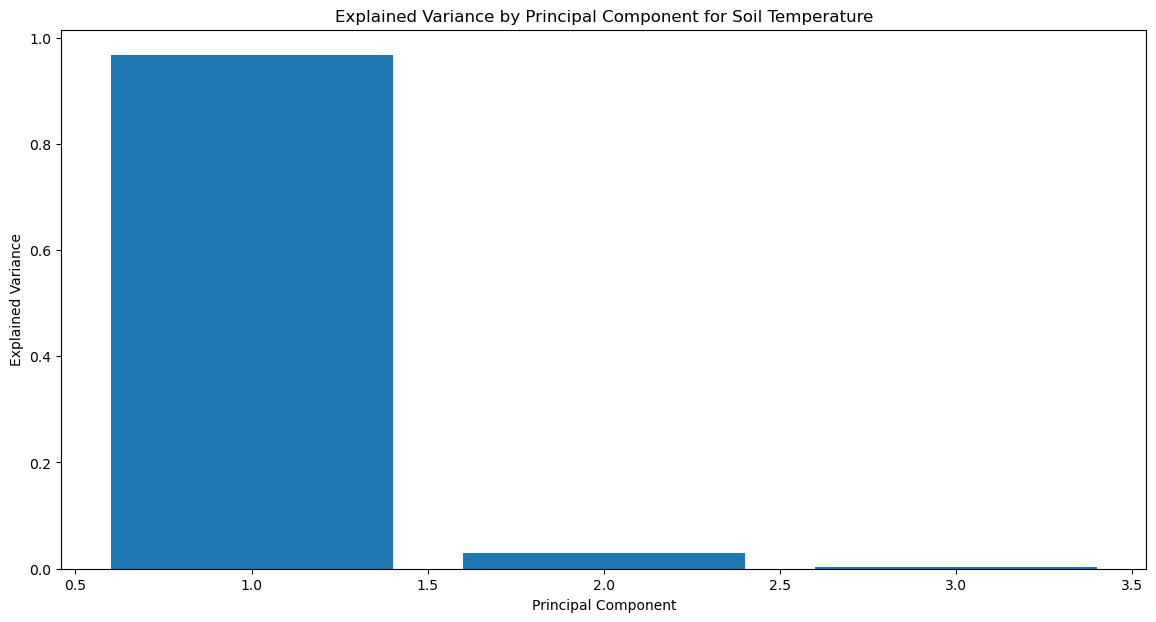

In [18]:
# Performing PCA with 3 components and plotting the explained variance

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

# Plotting the explained variance as bar plot

plt.figure(figsize=(14,7))
plt.bar(range(1,4), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component for Soil Temperature')
plt.show()

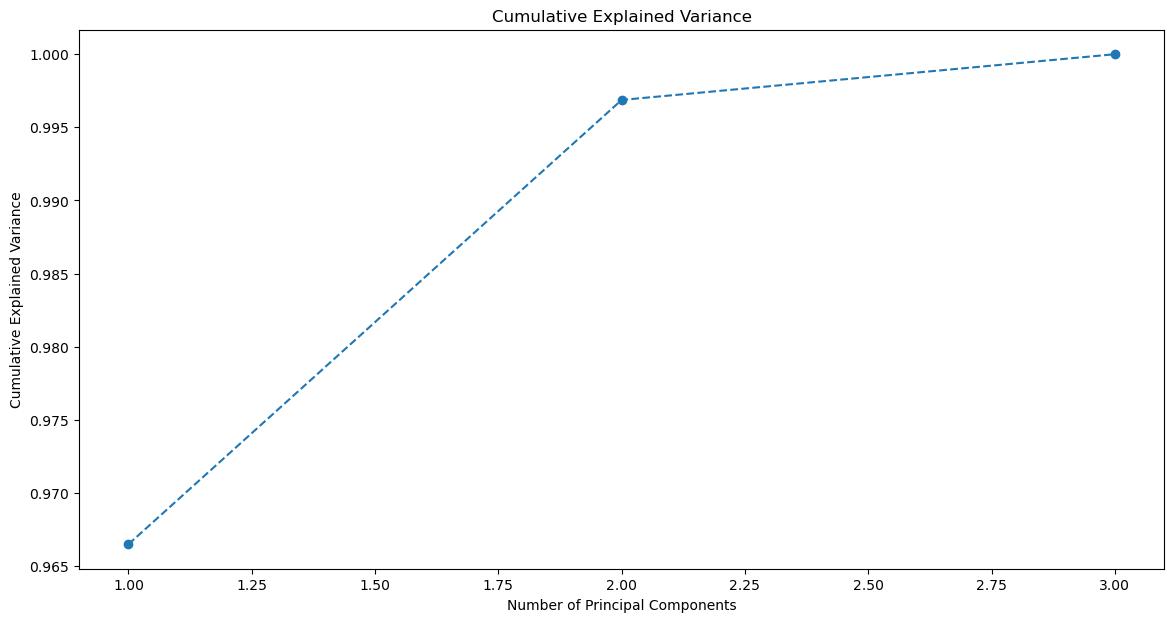

In [19]:
# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(14,7))
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()



&emsp; ***Analysis of results*** <br><br>
PC1 explains roughly 99% of the variance in soil temperature data. Let's recall that variance in PCA represents the spread or variability of the data along a principal component, that is, higher variance indicates that the component captures more of the data's overall structure and variability. PC1 captures almost all the important patterns in the dataset, making it highly representative of the original data, so we then can reduce the data to a single dimension.

In [26]:
# We can use the first principal component to represent the soil temperature data.

# Adding the first principal component to the dataframe
df['st_pca'] = principalDf['PC1']
df_reduced = df[['st_pca']]

# Reseting the index and dropping the old index
df.reset_index(drop=True, inplace=True)
df_reduced

,st_pca
0,-2.769385
1,-2.755428
2,-2.750950
3,-2.760139
4,-2.742763
...,...
4876,1.079429
4877,1.078747
4878,1.098344
4879,1.092285


In [ ]:
# Saving the final dataframe with PCA data (in case it is useful and think you're no longer going to analyze the old data)
# df.to_parquet('data/final_data/pueblo_pca.parquet')